# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Integración numérica: Método del Trapecio

### Ejercicio 14.- Calculamos aproximadamente la integral $$\displaystyle \int_{-2}^{0} \sqrt{3+\cos(x^2)+\sin(x^2)} \, dx$$ mediante el Método del Trapecio, con error absoluto menor que $10^{-3}$. Compara tu aproximación con la calculada por SAGE y representa gráficamente el problema.

SOLUCIÓN

Definimos la función $f(x)=\sqrt{3+\cos(x^2)+\sin(x^2)}$. Sabemos que la cota del error para el Método del Trapecio es la siguiente:
$$\displaystyle \left|{\rm Trapecio}_n(f)-\int_a^b f(x) \, dx\right| \leq \dfrac{(b-a)^3}{12\cdot n^2}\cdot M,$$
donde $M$ es una constante que cumpla $|f''(x)|\leq M$ para todo $x\in [a,b]$. 

Busquemos gráficamente $M$ y luego encontraremos $n$.

In [1]:
f(x)=sqrt(sin(x^2)+cos(x^2)+3)#definimos f
f

x |--> sqrt(cos(x^2) + sin(x^2) + 3)

In [2]:
a=-2;b=0;#definimos el intervalo

<p>Veamos qué área queremos calcular:</p>

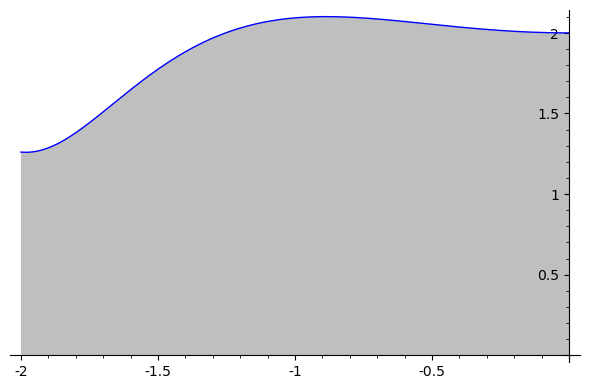

In [3]:
plot(f,x,a,b,fill=true)

Busquemos el $M$. Para eso, calculamos la segunda derivada y la acotamos.

In [4]:
show(derivative(f(x),x,2))

-(x*cos(x^2) - x*sin(x^2))^2/(cos(x^2) + sin(x^2) + 3)^(3/2) - (2*x^2*cos(x^2) + 2*x^2*sin(x^2) - cos(x^2) + sin(x^2))/sqrt(cos(x^2) + sin(x^2) + 3)

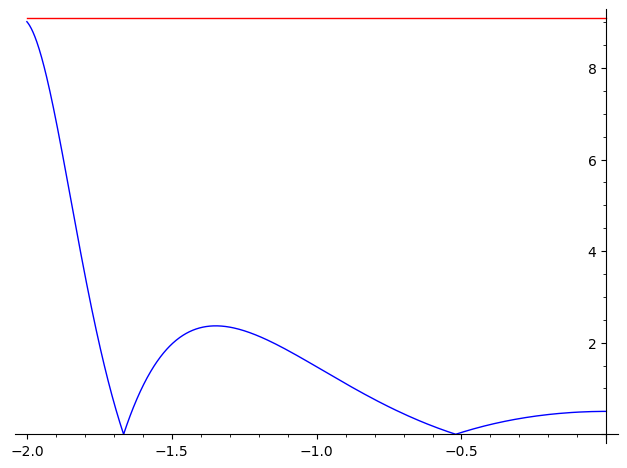

In [6]:
plot(abs(derivative(f(x),x,2)),(x,a,b))+plot(9.1,a,b,color='red')

Tomemos tomar $M=9.1$. 
Para determinar el número $n$ de subintervalos que debemos utilizar para alcanzar la precisión deseada, buscamos un $n$ que cumpla
$$\dfrac{(b-a)^3}{12\cdot n^2}\cdot M \leq \epsilon  \Longleftrightarrow \dfrac{1}{n^2} \leq \dfrac{12·\epsilon}{M·(b-a)^3}  \Longleftrightarrow n^2  \geq \dfrac{M·(b-a)^3}{12·\epsilon}  \Longleftrightarrow n \geq \sqrt{\dfrac{M·(b-a)^3}{12\cdot \epsilon}}$$

In [9]:
M=9.1;
epsilon=10^(-3);

In [11]:
numerical_approx( sqrt((b-a)^3*M/(12*epsilon))) #=> n=78

77.8888096369862

También se puede hacer iterando hasta encontrar el $n$ adecuado:

In [12]:
n=1
while (b-a)^3*M/(12*n^2)>epsilon:
    n=n+1

In [13]:
n

78

<p>Por tanto, vamos a aplicar el Método del Trapecio con $n=78$ subintervalos.</p>
<p>Calculamos la aproximación:</p>

In [14]:
X=[a+k*(b-a)/n for k in range(0,n+1)]
show(X) # X's en los que dividimos el intervalo [a,b]

[-2,
 -77/39,
 -76/39,
 -25/13,
 -74/39,
 -73/39,
 -24/13,
 -71/39,
 -70/39,
 -23/13,
 -68/39,
 -67/39,
 -22/13,
 -5/3,
 -64/39,
 -21/13,
 -62/39,
 -61/39,
 -20/13,
 -59/39,
 -58/39,
 -19/13,
 -56/39,
 -55/39,
 -18/13,
 -53/39,
 -4/3,
 -17/13,
 -50/39,
 -49/39,
 -16/13,
 -47/39,
 -46/39,
 -15/13,
 -44/39,
 -43/39,
 -14/13,
 -41/39,
 -40/39,
 -1,
 -38/39,
 -37/39,
 -12/13,
 -35/39,
 -34/39,
 -11/13,
 -32/39,
 -31/39,
 -10/13,
 -29/39,
 -28/39,
 -9/13,
 -2/3,
 -25/39,
 -8/13,
 -23/39,
 -22/39,
 -7/13,
 -20/39,
 -19/39,
 -6/13,
 -17/39,
 -16/39,
 -5/13,
 -14/39,
 -1/3,
 -4/13,
 -11/39,
 -10/39,
 -3/13,
 -8/39,
 -7/39,
 -2/13,
 -5/39,
 -4/39,
 -1/13,
 -2/39,
 -1/39,
 0]

In [15]:
trapecio=(b-a)/(2*n)*(f(a)+2*sum(f(X[k]) for k in range(1,n))+f(b))
numerical_approx( trapecio)

3.77535916701460

Conclusión: ${\rm Trapecio}_{78}(f)=3.77535916701460$ es una aproximación de $\displaystyle \int_a^b f(x) \, dx$ con error absoluto menor que $10^{-3}$.

Comparamos el resultado con el que nos da SAGE, para eso usamos la sentencia "numerical_integral".


In [16]:
numerical_integral(f,a,b)[0]

3.775350205616356

In [17]:
abs(numerical_integral(f,a,b)[0]-trapecio).n() < 10^(-3) #comprobemos el resultado

True

Veamos gráficamente lo qué hemos calculado con el método del TRAPECIO.

In [18]:
XY=[(X[j],f(X[j])) for j in range(0,n+1)]; 
r(c,d,x)=(f(d)-f(c))/(d-c)*(x-c)+f(c)
L=piecewise([[(X[j],X[j+1]),r(X[j],X[j+1],x)] for j in srange(0,len(X)-1)],var=x);

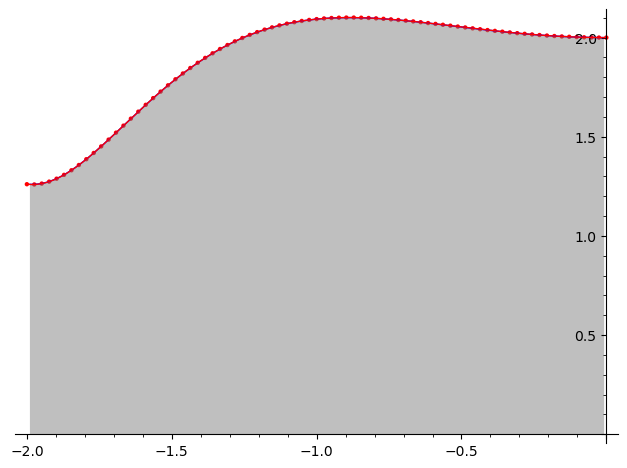

In [21]:
plot( L(x),(x,a,b),fill=true)+point2d(XY,size=10,color='red')+plot(f,a,b,color='red')